# Hipótesis 1:

### "Las provincias con una edad media menor y una renta media por hogar mayor a la nacional, suelen estar más concienciadas con el uso de energías renovables y utilizan más dispositivos que aprovechan este tipo de energía."

La justificación de esta hipótesis radica en que las personas jóvenes suelen estar más concienciadas con el medio ambiente, además de que tienen más tiempo para amortizar la inversión de este tipo de tecnología a lo largo de su vida.

<br>

### Preparación del entorno

In [973]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import numpy as np
from ydata_profiling import ProfileReport
from sklearn import preprocessing 
import os 
import scipy
import seaborn as sns
import plotly.express as px
from sklearn.metrics import DistanceMetric
from sklearn import metrics
from scipy import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

GOLD_DATA_PATH = os.path.join("..", "..", "data/gold/")

<br>

### Datos

Primero, cargamos el dataset correspondiente a la tarjeta de datos 1.

In [974]:
h1_df=pd.read_csv(GOLD_DATA_PATH+"data_card_1_df.csv", sep = ";", encoding = "latin")
h1_original=pd.read_csv(GOLD_DATA_PATH+"data_card_1_df.csv", sep = ";", encoding = "latin") # ya que al h1_df se hará modificaciones 
h1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Provincias                                                   47 non-null     object 
 1   Población Total                                              47 non-null     int64  
 2   Renta media por hogar                                        47 non-null     int64  
 3   Edad media                                                   47 non-null     float64
 4   Porcentaje de hogares con dispositivos de energía renovable  47 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


In [975]:
# Ejemplo de los datos que presenta la tabla
h1_df.head(5)

,Provincias,Población Total,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable
0,Albacete,385727,30908,43.677523,4.314062
1,Alicante/Alacant,1901594,28965,43.766889,4.036060
2,Almería,740534,28442,40.320448,6.713842
3,Araba/Álava,334412,38586,44.565691,10.445424
4,Asturias,1004686,33242,48.683390,5.031368


Visualizamos los datos.

In [976]:
fig = px.scatter_3d(h1_df, x='Renta media por hogar', y='Edad media', 
                    z='Porcentaje de hogares con dispositivos de energía renovable')
fig.show()

<br>

### Población total

In [977]:
poblacion_total_nacional = h1_df['Población Total'].sum()
print(f"La población total es de {poblacion_total_nacional} habitantes.")

La población total es de 43952773 habitantes.


<br>

### Cálculo de la edad media nacional

In [978]:
# Edad media nacional ponderada
edad_media_nacional = ((h1_df['Edad media'] * h1_df['Población Total']).sum()) / poblacion_total_nacional
print(f"La edad media nacional es de {edad_media_nacional} habitantes.")

La edad media nacional es de 43.69820011128763 habitantes.


<br>

### Cálculo de la renta media nacional

In [979]:
# Renta total nacional ponderada
renta_total_nacional = (h1_df['Renta media por hogar'] * h1_df['Población Total']).sum()

# Renta media nacional ponderada
renta_media_nacional = renta_total_nacional / poblacion_total_nacional

print("La renta media nacional ponderada es:", renta_media_nacional)

La renta media nacional ponderada es: 35878.80028661673


<br>

### Correlación de variables

In [980]:
columns = h1_df.columns[1:]
crr_results = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]

        # Calculate Pearson correlation
        pearson = scipy.stats.pearsonr(h1_df[col1], h1_df[col2])
        pearson_corr = pearson[0]
        pearson_pval = pearson[1]
        
        # Calculate Spearman correlation
        spear = scipy.stats.spearmanr(h1_df[col1], h1_df[col2])
        spear_corr = spear.correlation
        spear_pval = spear.pvalue

            
        # Save results
        crr_results.append({
            'Feature 1': col1,
            'Feature 2': col2,
            'Pearson Correlation': pearson_corr,
            'Pearson p-value': pearson_pval,
            'Spearman Correlation': spear_corr,
            'Spearman p-value': spear_pval
        })


crr_results_df = pd.DataFrame(crr_results)
crr_results_df.head(10)

,Feature 1,Feature 2,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value
0,Población Total,Renta media por hogar,0.499812,0.000348,0.192183,0.195608
1,Población Total,Edad media,-0.350727,0.015647,-0.535037,0.000107
2,Población Total,Porcentaje de hogares con dispositivos de ener...,0.213060,0.150462,0.207447,0.161765
3,Renta media por hogar,Edad media,-0.164277,0.269846,-0.113205,0.448667
4,Renta media por hogar,Porcentaje de hogares con dispositivos de ener...,0.254432,0.084373,0.312905,0.032234
5,Edad media,Porcentaje de hogares con dispositivos de ener...,-0.444344,0.001754,-0.511101,0.000241


Nos centraremos en la fila 5 de la tabla de correlaciones. 
- Correlación de Pearson:
    - Valor de la correlación de Pearson: -0.444344.
        - El valor de la correlación de Pearson es negativo, lo que sugiere una relación inversa entre la edad media y el porcentaje de hogares con dispositivos de energía renovable. En otras palabras, cuando uno de estos valores aumenta, el otro tiende a disminuir.
        - El valor de la correlación de -0.444344 indica que hay una relación negativa moderada entre estas dos características.

    - Valor p de Pearson: 0.001754.
        - El valor p asociado con la correlación de Pearson es muy bajo (menor que 0.05), lo que sugiere que esta correlación es estadísticamente significativa. Es decir, la relación observada probablemente no sea aleatoria.

- Correlación de Spearman:
    - Valor de la correlación de Spearman: -0.511101.
        - La correlación de Spearman también es negativa, pero un poco más fuerte que la de Pearson.
        - Este valor también sugiere que conforme aumenta la edad media, tiende a disminuir el porcentaje de hogares con dispositivos de energía renovable.


    - Valor p de Spearman: 0.000241.
        - Al igual que el valor p de Pearson, el valor p de Spearman es extremadamente bajo, lo que indica que la correlación observada es estadísticamente significativa. Esto refuerza la conclusión de que existe una relación no aleatoria entre estas dos variables.

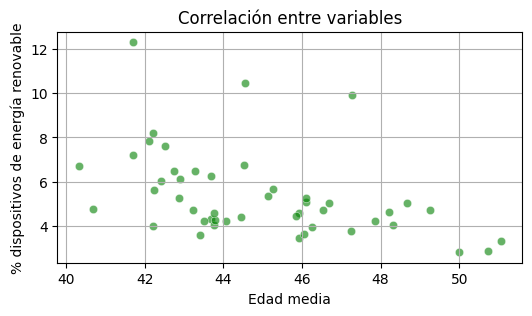

In [981]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=h1_df, x='Edad media', y='Porcentaje de hogares con dispositivos de energía renovable', color='green', alpha=0.6)
plt.title('Correlación entre variables')
plt.xlabel('Edad media')
plt.ylabel('% dispositivos de energía renovable')
plt.grid(True)
plt.show()

##### Conclusiones

Mediante el estudio de correlación, hemos podido confirmar que existe una relación negativa moderada entre la edad media y el porcentaje de hogares con dispositivos de energía renovable. Esto nos acerca a validar nuestra hipótesis, pero tenemos que tener en cuenta la renta media y la correlación entre variables no nos aporta nada para esta variable.

<br>

### Transformaciones previas

Antes de continuar, necesitamos poner todos los datos en la misma escala. Se va a usar MinMaxScaler, que ajusta los valores para que el mínimo sea 0 y el máximo 1. Esto puede distorsionar un poco los datos, pero suele ayudar a obtener mejores resultados en técnicas de clustering.

In [982]:
h1_df.drop('Población Total', axis=1, inplace=True)

In [983]:
h1_df.head()

,Provincias,Renta media por hogar,Edad media,Porcentaje de hogares con dispositivos de energía renovable
0,Albacete,30908,43.677523,4.314062
1,Alicante/Alacant,28965,43.766889,4.036060
2,Almería,28442,40.320448,6.713842
3,Araba/Álava,38586,44.565691,10.445424
4,Asturias,33242,48.683390,5.031368


In [984]:
min_max_scaler = preprocessing.RobustScaler()
datanorm = min_max_scaler.fit_transform(h1_df.iloc[:, 1:])

<br>

### Modelado

#### a) Clustering Jerárquico

El clustering jerárquico organiza los datos en una estructura de árbol llamada dendrograma, que muestra cómo se relacionan los clusters entre sí. La raíz del árbol representa todos los elementos, mientras que las hojas corresponden a los grupos con mayor similitud. Los niveles intermedios reflejan la fusión o división de los clusters en diferentes etapas.

Similarity matrix.

In [985]:
dist = DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(datanorm)

fig = px.imshow(matsim)
fig.show()

Dendrogram.

Una vez calculada la matriz de similitud, pasamos a construir el dendrograma. Para ello, se ha seleccionado el método Ward, que emplea el algoritmo de minimización de varianza de Ward. La nueva entrada d(u,v) se calcula de la siguiente manera:

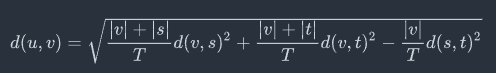

Para más información sobre luster.hierarchy.linkage ver [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_19780\2858820463.py:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



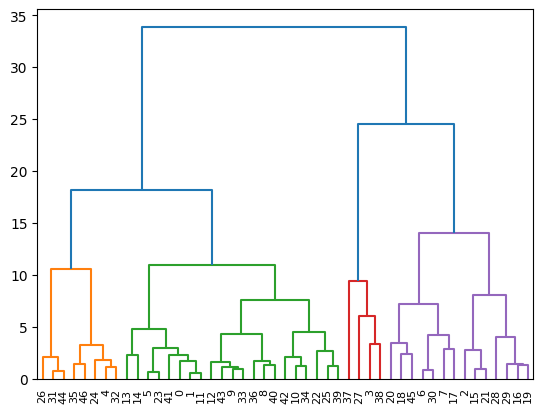

<Figure size 640x480 with 0 Axes>

In [986]:
# métodos posibles ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
clusters = cluster.hierarchy.linkage(matsim, method = 'ward')
cluster.hierarchy.dendrogram(clusters, color_threshold=18, labels = h1_df.index)
f = plt.figure()
plt.show()

Se han probado los diferentes métodos ('single', 'complete', 'average'...). Sin embargo, el método 'complete' genera 2 grupos y 'ward' crea 4. Los demás métodos clasifican todos los datos en un solo grupo. Por esta razón, se ha decidido utilizar el método Ward para el cálculo de la distancia entre los clusters.

El resultado del clustering jerárquico muestra que los datos se han dividido en 4 grupos.

In [987]:
cut = 16 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([2, 2, 4, 3, 1, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 1, 2, 1, 3, 4, 4, 4, 1, 1, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2,
       1, 4, 1], dtype=int32)

Ahora pasamos a interpretar los resultados obtenidos del clustering y a aplicar métricas de calidad para evaluar la efectividad de la agrupación.

Silhouette Coefficient.

In [988]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, labels))

Estimated number of clusters: 4
Silhouette Coefficient: 0.254


Conclusión: (valor cercano a 0) los puntos están en la frontera entre dos grupos. No es claro a qué grupo pertenecen, lo que indica que la calidad del clustering no es alta.

Visualizamos los datos.

In [989]:
fig = px.scatter_3d(h1_df, x='Renta media por hogar', y='Edad media', 
                    z='Porcentaje de hogares con dispositivos de energía renovable', color = labels)
fig.show()

Dibujamos un gráfico de barras para cada característica con el objetivo de interpretar y ver el objetivo de cada grupo.

#### Conclusiones

<br>

#### b) K-Means Clustering

Para determinar el número óptimo de grupos, se utilizará el método del codo (Elbow Method). Este método nos indica la ganancia que se obtiene al hacer n clusters. El objetivo es buscar el punto óptimo ganancia/clusters.

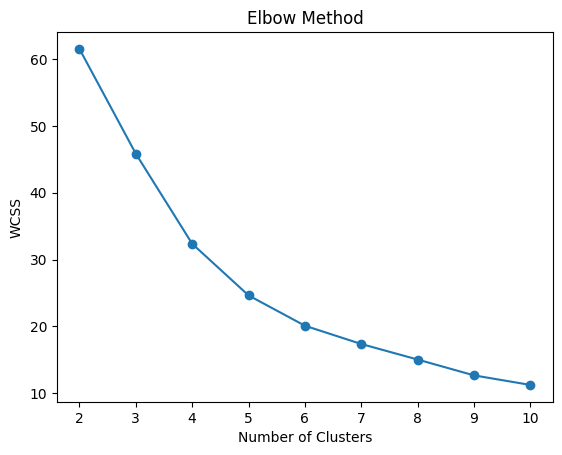

In [990]:
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(datanorm)
    wcss.append(kmeans.inertia_)

# Se dibuja la gráfica
plt.plot(range(2, 11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Entrenamos el modelo y vemos los resultados.

In [991]:
k = 4 # grupos

# Se entrena el modelo
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(datanorm)

fig = px.scatter_3d(h1_df, x='Renta media por hogar', y='Edad media', 
                    z='Porcentaje de hogares con dispositivos de energía renovable', color = kmeans.labels_)
fig.show()

😁😁😁